<a href="https://colab.research.google.com/github/marisbotero/Master_IA/blob/main/Analisis_encuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/Encuesta de genero-comunidad de Data Science (Respuestas).xlsx')

In [4]:
df.head()

,id,País,Ciudad,Edad,Profesión,¿Trabajas en el ámbito de la tecnología o la inteligencia artificial?,¿Cuál es tu campo de trabajo o área de especialización?,¿Has oído hablar del sesgo de género en los sistemas de inteligencia artificial?,¿Crees que los sistemas de inteligencia artificial pueden estar sesgados hacia algún género?,¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?,¿Consideras que la presencia de sesgo de género en los sistemas de inteligencia artificial es un problema grave?,¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?,¿Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?,¿Consideras que los desarrolladores de los sistemas de inteligencia artificial deberían ser responsables de prevenir el sesgo de género en sus creaciones?,¿Has experimentado alguna vez un trato injusto o discriminatorio en relación con un sistema de inteligencia artificial debido a tu género?,¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?,¿Crees que se deberían establecer regulaciones y políticas públicas para prevenir el sesgo de género en los sistemas de inteligencia artificial?,¿Crees que la diversidad de género en los equipos de desarrollo de sistemas de inteligencia artificial puede ayudar a prevenir el sesgo de género en los productos?
0,1,Colombia,Envigado,mas de 35,Ingeniera de sistemas,No,Business Intelligence,si,si,Se da especialmente en la parte comercial,si,Las fuentes de datos,Haciendo la medición la prediccion,si,No,NaN,NaN,si
1,2,Colombia,Acacías,26,Ingeniera de sistemas,si,Ciencia de datos,si,si,Que los datos es un reflejo del mundo real y s...,si,La sociedad,Realizar análisis de datos,si,si,Seguir hablando y cómo mujeres trabajar la int...,si,NaN
2,3,Bolivia,Cochabamba,32,Ingeniera de sistemas,si,Informática forense,No,si,Que se necesita saber más porque uno piensa de...,si,No conocer bien el análisis del que se está ha...,Considerar todos los datos del sesgo para anal...,si,si,Tal vez mediante el reconocimiento facial o voz,si,si
3,4,Colombia,Jamundí,mas de 35,Ingeniero en Electrónica,si,Telecomunicaciones,si,si,Se requiere más diversidad de datos para entre...,si,Los datos con los que entrenan los modelos,Diversificando la toma de los datos,si,No,"Desrrollando normas y politicas preventivas, r...",si,si
4,5,Venezuela,Maracaibo,mas de 35,Lic. Relaciones Industriales,No,"Gerencia Seguridad, HIgiene y Ambiente",si,si,Ninguno de nosotros se salva de este efecto po...,si,Pienso que una de las causas principales es qu...,Reforzar el conocimiento en IA para toda la so...,si,No,Reforzar conocimiento en IA para toda la socie...,si,si


In [6]:
! pip install nltk

In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Concatenar las respuestas sobre el sesgo de género en un solo texto
respuestas_sesgo_genero = df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')

# Tokenizar el texto en palabras
tokens = word_tokenize(respuestas_sesgo_genero)

# Calcular la frecuencia de cada palabra
frecuencia_palabras = FreqDist(tokens)

# Mostrar las palabras más frecuentes
print(frecuencia_palabras.most_common(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('de', 107), (',', 61), ('que', 61), ('la', 52), ('los', 47), ('en', 39), ('género', 27), ('no', 26), ('.', 24), ('y', 21)]


In [5]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.2 MB/s eta 0:00:00


In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from unidecode import unidecode

# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')


# Concatenar las respuestas sobre el sesgo de género en un solo texto
respuestas_sesgo_genero = df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')

# Convertir el texto a minúsculas y eliminar tildes
respuestas_sesgo_genero = unidecode(respuestas_sesgo_genero.lower())

# Tokenizar el texto en palabras
tokens = word_tokenize(respuestas_sesgo_genero)

# Eliminar stopwords y signos de puntuación
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Calcular la frecuencia de cada palabra
frecuencia_palabras = FreqDist(filtered_tokens)

# Mostrar las palabras más frecuentes
print(frecuencia_palabras.most_common(20))


[('genero', 29), ('sesgos', 21), ('datos', 17), ('informacion', 17), ('inteligencia', 16), ('artificial', 15), ('sistemas', 13), ('modelos', 12), ('ia', 12), ('sesgo', 9), ('estan', 8), ('idea', 8), ('sabia', 8), ('existia', 8), ('si', 7), ('mas', 6), ('decisiones', 6), ('tambien', 6), ('internet', 6), ('mujeres', 5)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


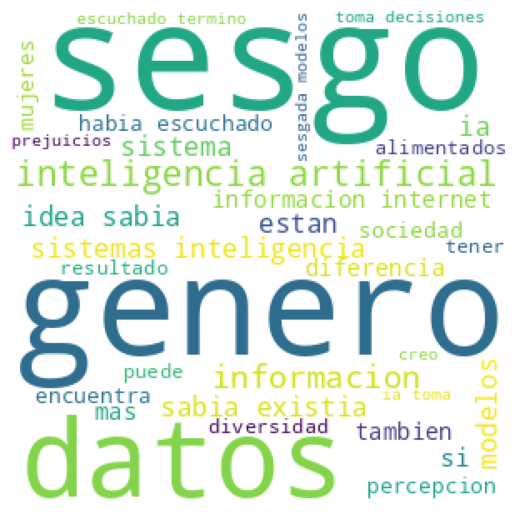

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from unidecode import unidecode

# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Simulación de un DataFrame de pandas (reemplazar por tu DataFrame real)
respuestas_sesgo_genero = df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?']

# Concatenar las respuestas sobre el sesgo de género en un solo texto
respuestas_sesgo_genero = df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')

# Convertir el texto a minúsculas y eliminar tildes
respuestas_sesgo_genero = unidecode(respuestas_sesgo_genero.lower())

# Tokenizar el texto en palabras
tokens = word_tokenize(respuestas_sesgo_genero)

# Eliminar stopwords y signos de puntuación
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Generar una cadena de texto para la nube de palabras
text_for_wordcloud = ' '.join(filtered_tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width = 300, height =300,
                      background_color ='white',
                      min_font_size = 10).generate(text_for_wordcloud)

# Mostrar la nube de palabras
plt.figure(figsize = (5, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


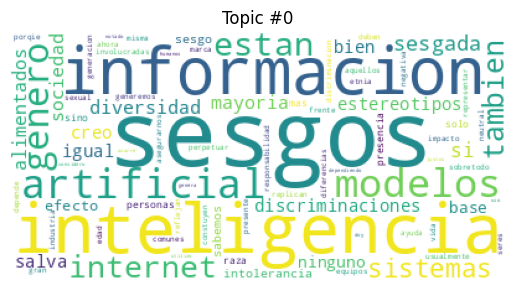

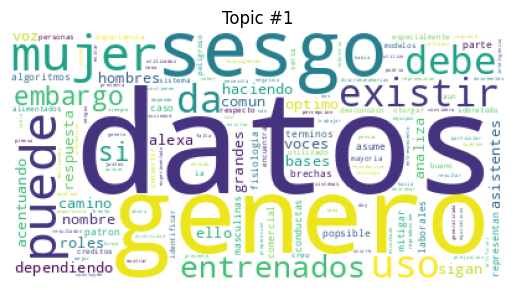

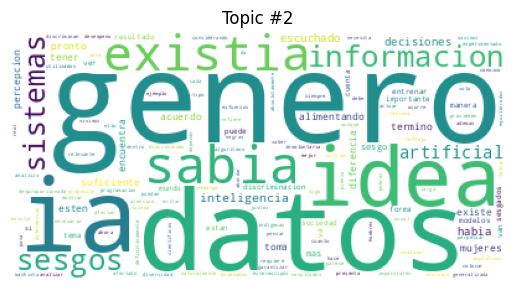

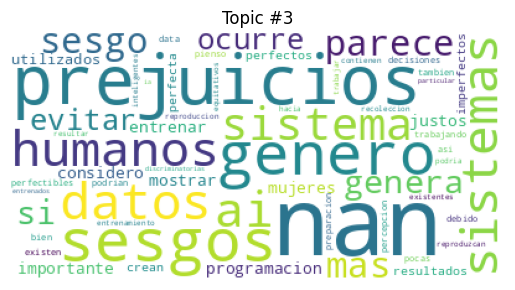

In [10]:
import pandas as pd
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode

# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Suponiendo que 'df' es tu DataFrame
# df = pd.read_csv('tu_archivo.csv')

# Preprocesamiento del texto
stop_words = set(stopwords.words('spanish'))
processed_docs = []

for respuesta in df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?']:
    respuesta = unidecode(str(respuesta).lower())
    tokens = word_tokenize(respuesta)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    processed_docs.append(filtered_tokens)

# Crear un diccionario y corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Entrenar el modelo LDA
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=15)

# Generar nubes de palabras para cada tópico
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()


In [4]:
!pip install textblob


In [12]:
from textblob import TextBlob

# Suponiendo que df es tu DataFrame y que has llevado a cabo algún tipo de preprocesamiento
# df = pd.read_csv('tu_archivo.csv')

# Función para obtener la polaridad del sentimiento
def sentiment_polarity(text):
    if pd.isna(text) or not isinstance(text, str):
        return None
    return TextBlob(text).sentiment.polarity

# Función para obtener la subjetividad del sentimiento
def sentiment_subjectivity(text):
    if pd.isna(text) or not isinstance(text, str):
        return None
    return TextBlob(text).sentiment.subjectivity

# Aplicar las funciones al DataFrame
df['Sentiment_Polarity'] = df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].apply(sentiment_polarity)
df['Sentiment_Subjectivity'] = df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].apply(sentiment_subjectivity)

# Ahora df tiene dos nuevas columnas: 'Sentiment_Polarity' y 'Sentiment_Subjectivity'


In [13]:
print(df[['Sentiment_Polarity', 'Sentiment_Subjectivity']].describe())


       Sentiment_Polarity  Sentiment_Subjectivity
count           51.000000               51.000000
mean            -0.166340                0.309804
std              0.292033                0.451863
min             -0.800000                0.000000
25%             -0.425000                0.000000
50%              0.000000                0.000000
75%              0.000000                1.000000
max              0.200000                1.000000


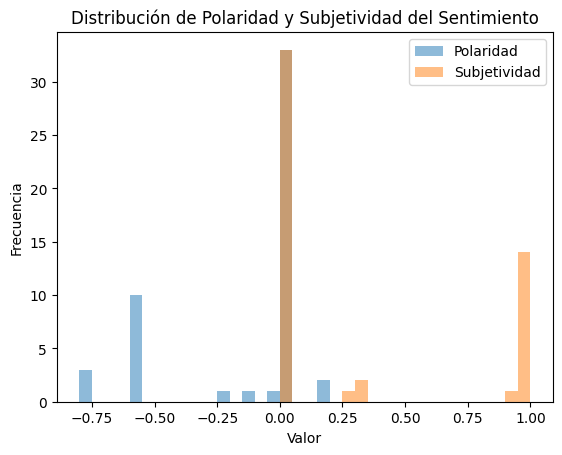

In [14]:
import matplotlib.pyplot as plt

plt.hist(df['Sentiment_Polarity'].dropna(), bins=20, alpha=0.5, label='Polaridad')
plt.hist(df['Sentiment_Subjectivity'].dropna(), bins=20, alpha=0.5, label='Subjetividad')
plt.legend(loc='upper right')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Polaridad y Subjetividad del Sentimiento')
plt.show()


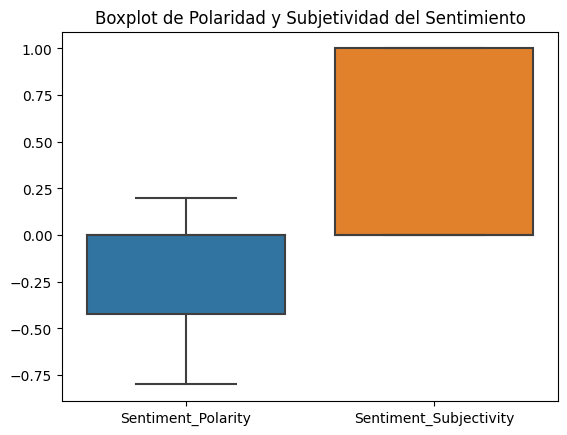

In [15]:
import seaborn as sns

sns.boxplot(data=df[['Sentiment_Polarity', 'Sentiment_Subjectivity']])
plt.title('Boxplot de Polaridad y Subjetividad del Sentimiento')
plt.show()


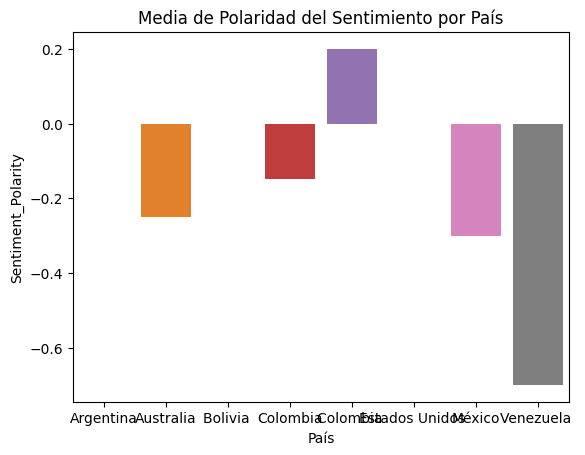

In [16]:
# Media de polaridad por país
grouped_df = df.groupby('País')['Sentiment_Polarity'].mean().reset_index()

sns.barplot(x='País', y='Sentiment_Polarity', data=grouped_df)
plt.title('Media de Polaridad del Sentimiento por País')
plt.show()


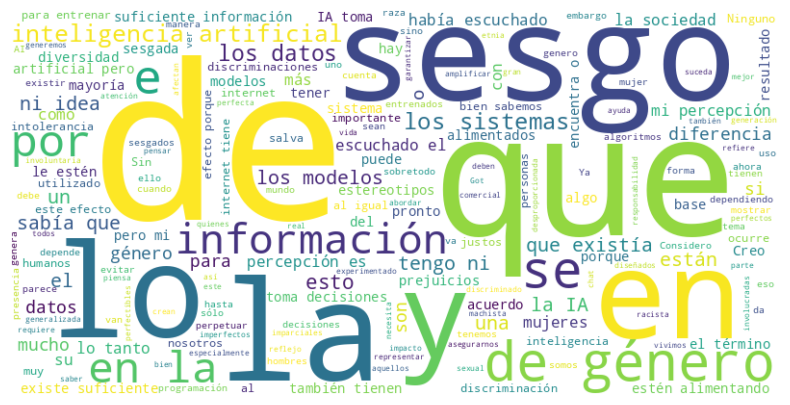

In [17]:
from wordcloud import WordCloud

# Concatenar todas las respuestas en una única cadena de texto
all_responses = ' '.join(df['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_responses)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [18]:
# Mostrar las palabras clave para cada tópico
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f'Tópico {topic[0]}: Palabras clave = {topic[1]}')

Tópico 0: Palabras clave = 0.040*"sesgos" + 0.040*"inteligencia" + 0.036*"informacion" + 0.036*"artificial" + 0.035*"modelos"
Tópico 1: Palabras clave = 0.023*"datos" + 0.023*"genero" + 0.016*"sesgo" + 0.016*"mujer" + 0.016*"puede"
Tópico 2: Palabras clave = 0.045*"genero" + 0.034*"datos" + 0.028*"ia" + 0.023*"idea" + 0.023*"sabia"
Tópico 3: Palabras clave = 0.063*"nan" + 0.029*"prejuicios" + 0.022*"genero" + 0.022*"sesgos" + 0.015*"sistemas"


In [34]:
#df['¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


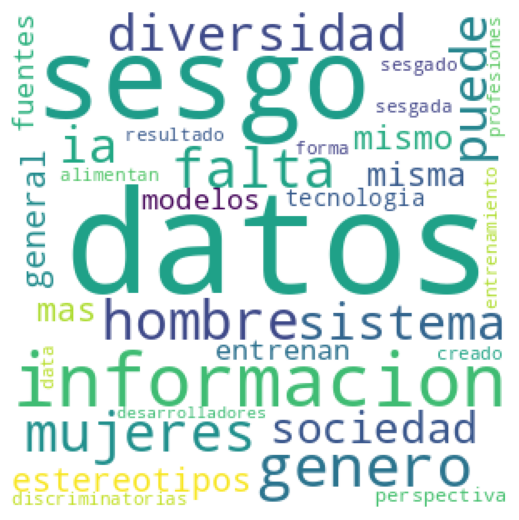

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from unidecode import unidecode

# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Simulación de un DataFrame de pandas (reemplazar por tu DataFrame real)
respuestas_sesgo_genero = df['¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?']

# Concatenar las respuestas sobre el sesgo de género en un solo texto
respuestas_sesgo_genero = df['¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')

# Convertir el texto a minúsculas y eliminar tildes
respuestas_sesgo_genero = unidecode(respuestas_sesgo_genero.lower())

# Tokenizar el texto en palabras
tokens = word_tokenize(respuestas_sesgo_genero)

# Eliminar stopwords y signos de puntuación
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Generar una cadena de texto para la nube de palabras
text_for_wordcloud = ' '.join(filtered_tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width = 300, height =300,
                      background_color ='white',
                      min_font_size = 10).generate(text_for_wordcloud)

# Mostrar la nube de palabras
plt.figure(figsize = (5, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


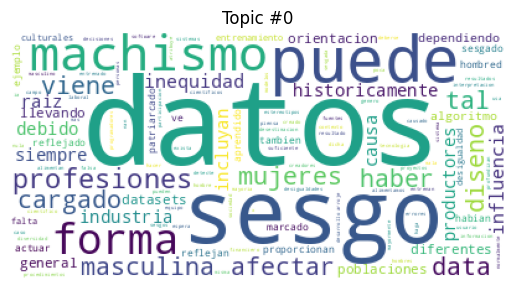

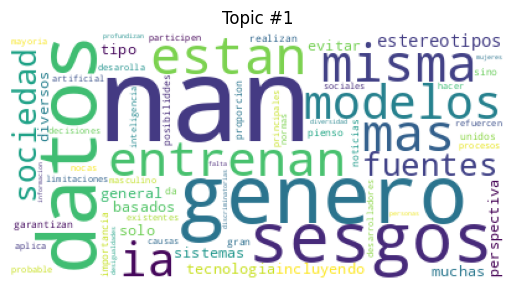

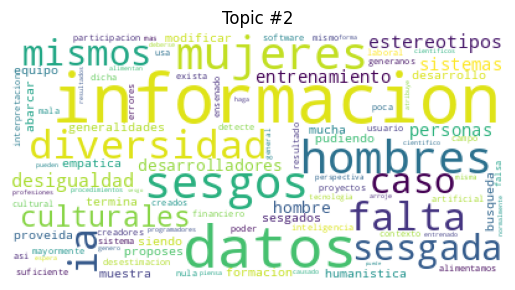

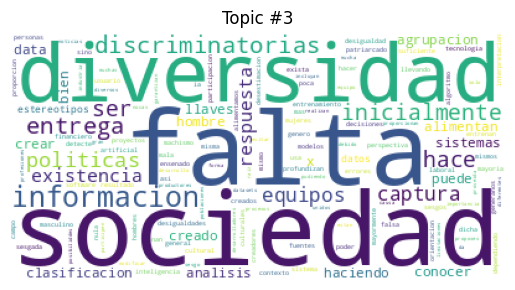

In [23]:
import pandas as pd
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode

# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Suponiendo que 'df' es tu DataFrame
# df = pd.read_csv('tu_archivo.csv')

# Preprocesamiento del texto
stop_words = set(stopwords.words('spanish'))
processed_docs = []

for respuesta in df['¿Cuáles crees que pueden ser las posibles causas del sesgo de género en los sistemas de inteligencia artificial?']:
    respuesta = unidecode(str(respuesta).lower())
    tokens = word_tokenize(respuesta)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    processed_docs.append(filtered_tokens)

# Crear un diccionario y corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Entrenar el modelo LDA
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=15)

# Generar nubes de palabras para cada tópico
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()


In [24]:
# Mostrar las palabras clave para cada tópico
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f'Tópico {topic[0]}: Palabras clave = {topic[1]}')

Tópico 0: Palabras clave = 0.061*"datos" + 0.027*"sesgo" + 0.027*"puede" + 0.020*"machismo" + 0.014*"forma"
Tópico 1: Palabras clave = 0.099*"nan" + 0.037*"genero" + 0.036*"datos" + 0.030*"sesgos" + 0.016*"misma"
Tópico 2: Palabras clave = 0.049*"informacion" + 0.035*"datos" + 0.019*"hombres" + 0.019*"sesgos" + 0.019*"mujeres"
Tópico 3: Palabras clave = 0.016*"sociedad" + 0.016*"falta" + 0.016*"diversidad" + 0.016*"informacion" + 0.016*"discriminatorias"


Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


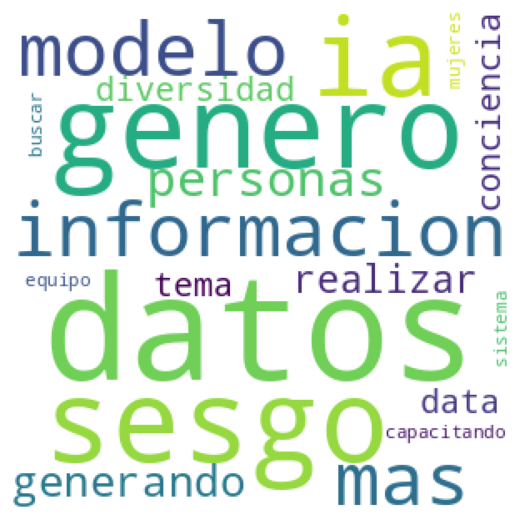

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from unidecode import unidecode

# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Simulación de un DataFrame de pandas (reemplazar por tu DataFrame real)
respuestas_sesgo_genero = df['¿Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?']

# Concatenar las respuestas sobre el sesgo de género en un solo texto
respuestas_sesgo_genero = df['¿Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?'].dropna().str.cat(sep=' ')

# Convertir el texto a minúsculas y eliminar tildes
respuestas_sesgo_genero = unidecode(respuestas_sesgo_genero.lower())

# Tokenizar el texto en palabras
tokens = word_tokenize(respuestas_sesgo_genero)

# Eliminar stopwords y signos de puntuación
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Generar una cadena de texto para la nube de palabras
text_for_wordcloud = ' '.join(filtered_tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width = 300, height =300,
                      background_color ='white',
                      min_font_size = 10).generate(text_for_wordcloud)

# Mostrar la nube de palabras
plt.figure(figsize = (5, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


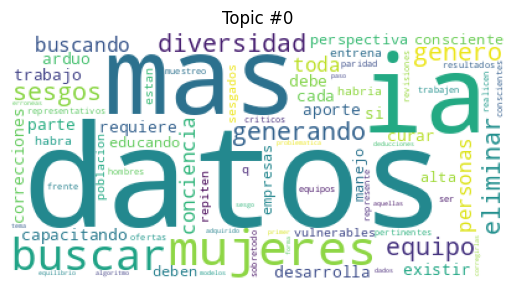

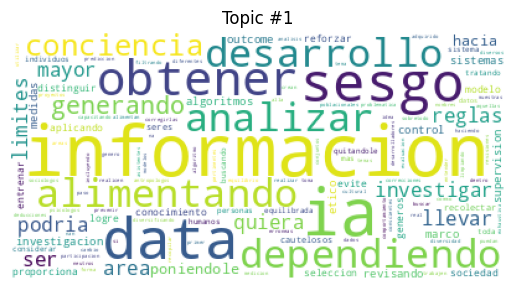

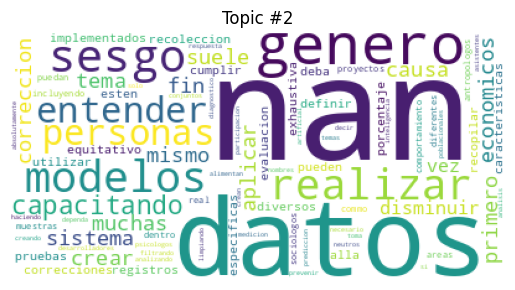

In [9]:
import pandas as pd
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode

# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Suponiendo que 'df' es tu DataFrame
# df = pd.read_csv('tu_archivo.csv')

# Preprocesamiento del texto
stop_words = set(stopwords.words('spanish'))
processed_docs = []

for respuesta in df['¿Cómo crees que se podría prevenir el sesgo de género en los sistemas de inteligencia artificial?']:
    respuesta = unidecode(str(respuesta).lower())
    tokens = word_tokenize(respuesta)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    processed_docs.append(filtered_tokens)

# Crear un diccionario y corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Entrenar el modelo LDA
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=15)

# Generar nubes de palabras para cada tópico
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()


In [10]:
# Mostrar las palabras clave para cada tópico
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f'Tópico {topic[0]}: Palabras clave = {topic[1]}')

Tópico 0: Palabras clave = 0.039*"datos" + 0.021*"ia" + 0.021*"mas" + 0.020*"mujeres" + 0.020*"buscar"
Tópico 1: Palabras clave = 0.037*"informacion" + 0.031*"ia" + 0.023*"data" + 0.021*"sesgo" + 0.016*"obtener"
Tópico 2: Palabras clave = 0.099*"nan" + 0.043*"datos" + 0.031*"genero" + 0.018*"sesgo" + 0.016*"modelos"


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


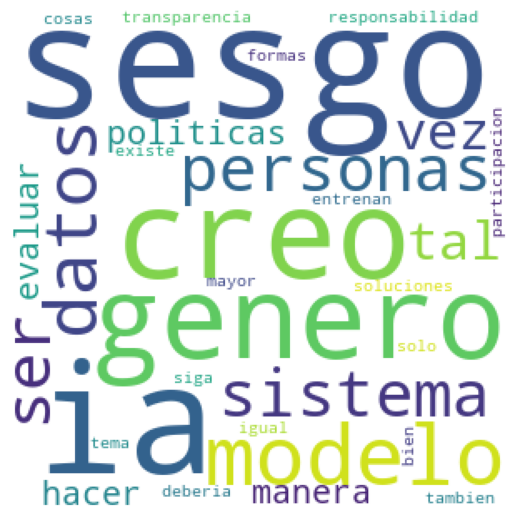

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from unidecode import unidecode

# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Simulación de un DataFrame de pandas (reemplazar por tu DataFrame real)
respuestas_sesgo_genero = df['¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?']

# Concatenar las respuestas sobre el sesgo de género en un solo texto
respuestas_sesgo_genero = df['¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?'].dropna().str.cat(sep=' ')

# Convertir el texto a minúsculas y eliminar tildes
respuestas_sesgo_genero = unidecode(respuestas_sesgo_genero.lower())

# Tokenizar el texto en palabras
tokens = word_tokenize(respuestas_sesgo_genero)

# Eliminar stopwords y signos de puntuación
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Generar una cadena de texto para la nube de palabras
text_for_wordcloud = ' '.join(filtered_tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width = 300, height =300,
                      background_color ='white',
                      min_font_size = 10).generate(text_for_wordcloud)

# Mostrar la nube de palabras
plt.figure(figsize = (5, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


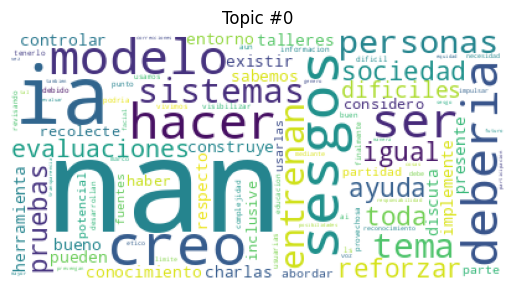

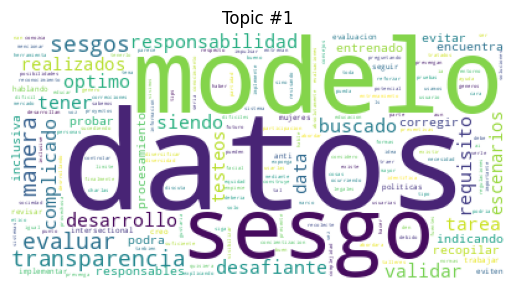

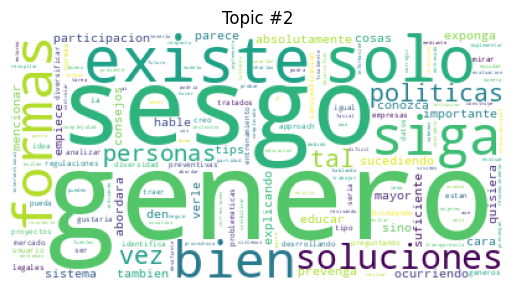

In [12]:
import pandas as pd
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode

# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Suponiendo que 'df' es tu DataFrame
# df = pd.read_csv('tu_archivo.csv')

# Preprocesamiento del texto
stop_words = set(stopwords.words('spanish'))
processed_docs = []

for respuesta in df['¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?']:
    respuesta = unidecode(str(respuesta).lower())
    tokens = word_tokenize(respuesta)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    processed_docs.append(filtered_tokens)

# Crear un diccionario y corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Entrenar el modelo LDA
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=15)

# Generar nubes de palabras para cada tópico
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [13]:
# Mostrar las palabras clave para cada tópico
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f'Tópico {topic[0]}: Palabras clave = {topic[1]}')

Tópico 0: Palabras clave = 0.159*"nan" + 0.036*"ia" + 0.016*"creo" + 0.016*"sesgos" + 0.012*"ser"
Tópico 1: Palabras clave = 0.022*"datos" + 0.021*"modelo" + 0.021*"sesgo" + 0.012*"transparencia" + 0.012*"evaluar"
Tópico 2: Palabras clave = 0.023*"genero" + 0.016*"sesgo" + 0.016*"existe" + 0.016*"solo" + 0.016*"siga"


Análisis de sentimientos y bigramas

In [15]:
pip install textblob


In [17]:
from textblob import TextBlob
import pandas as pd


In [18]:
def analyze_sentiment(text):
    if pd.notnull(text):
        return TextBlob(str(text)).sentiment.polarity
    else:
        return None

for question in ['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?', '¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?']:
    df[f'Sentimiento_{question}'] = df[question].apply(analyze_sentiment)


In [22]:
df['Sentimiento_¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'].head()

0    0.0
1    0.2
2    0.0
3    0.0
4   -0.8
Name: Sentimiento_¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?, dtype: float64

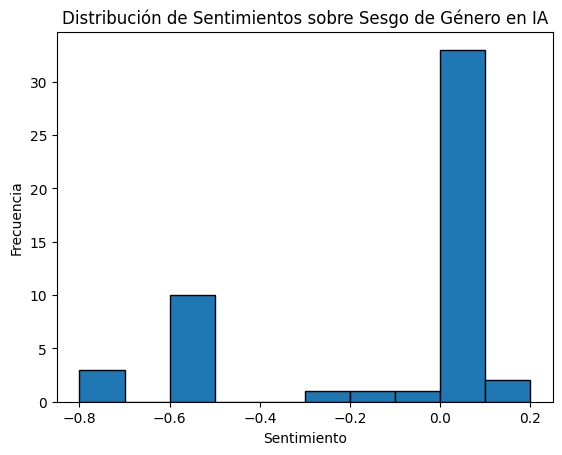

In [25]:
import matplotlib.pyplot as plt

plt.hist(df['Sentimiento_¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'], bins=10, edgecolor='black')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sentimientos sobre Sesgo de Género en IA')
plt.show()


In [26]:
df['Categoria_Sentimiento'] = pd.cut(
    df['Sentimiento_¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?'],
    bins=[-1, -0.01, 0.01, 1],
    labels=['Negativo', 'Neutral', 'Positivo']
)


In [28]:
df['Categoria_Sentimiento'].value_counts()

Neutral     33
Negativo    16
Positivo     2
Name: Categoria_Sentimiento, dtype: int64

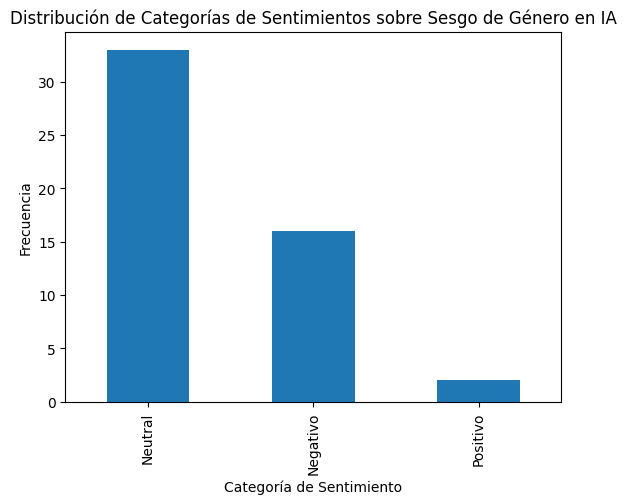

In [27]:
df['Categoria_Sentimiento'].value_counts().plot(kind='bar')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías de Sentimientos sobre Sesgo de Género en IA')
plt.show()


In [23]:
import nltk
from nltk import bigrams
from collections import Counter

In [24]:
def common_bigrams(text_column):
    all_responses = ' '.join(text_column.dropna())
    tokens = nltk.word_tokenize(all_responses.lower())
    bi_tokens = list(bigrams(tokens))
    bi_freq = Counter(bi_tokens)
    return bi_freq.most_common(10)

for question in ['¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?', '¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?']:
    print(f"Bigramas más comunes para la pregunta '{question}':")
    print(common_bigrams(df[question]))


Bigramas más comunes para la pregunta '¿Cuál es tu percepción acerca de la presencia de sesgo de género en los sistemas de inteligencia artificial?':
[(('de', 'género'), 21), (('de', 'la'), 17), (('en', 'la'), 13), (('inteligencia', 'artificial'), 13), (('los', 'sistemas'), 12), (('los', 'datos'), 11), (('sistemas', 'de'), 10), ((',', 'no'), 10), (('que', 'la'), 10), (('información', 'de'), 10)]
Bigramas más comunes para la pregunta '¿Cómo te gustaría que se abordara el sesgo de género en los sistemas de inteligencia artificial en el futuro?':
[(('que', 'se'), 7), (('de', 'la'), 4), (('a', 'las'), 4), (('creo', 'que'), 4), (('la', 'ia'), 3), (('en', 'los'), 3), (('las', 'que'), 3), (('de', 'género'), 3), (('que', 'es'), 3), (('tal', 'vez'), 2)]
